# Graficar periodos dominantes anualmente

In [13]:
%matplotlib inline
from obspy.core import read, UTCDateTime

In [14]:
from sqlalchemy import create_engine
import pickle

In [15]:
import os
import glob
finaldata='/LAMBDATA/hvfinals_assi/'

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvsrpy
from hvsrpy import utils

In [5]:
hvspi=glob.glob(finaldata+'AZ*')
hvspi.sort()

In [6]:
from datetime import datetime
import os
distribution_mc = "lognormal"
x=[]
y=[]
for hva in hvspi:
    nam=os.path.basename(hva)
    tim=nam[5:18]+":00:00"
    ti=datetime.strptime(tim,'%Y-%m-%d:%H:%M:%S')
    x.append(ti)
    #print(ti)
    with open(hva,"rb") as rt:
        hv=pickle.load(rt)
    y.append(hv.mc_peak_frq(distribution_mc))
        #print(x)

In [7]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


In [8]:
data = np.array(y)
dt=moving_average(data,300)

In [9]:
npad=len(y)-len(dt)

In [10]:
arr = [1, 3, 2, 5, 4]
  
# padding array using CONSTANT mode
pad_arr = np.pad(dt, (npad, 0), 'constant', 
                 constant_values=(y[0]))
  
print((len(pad_arr),len(y)))


(5261, 5261)


In [11]:
f=dt.tolist()


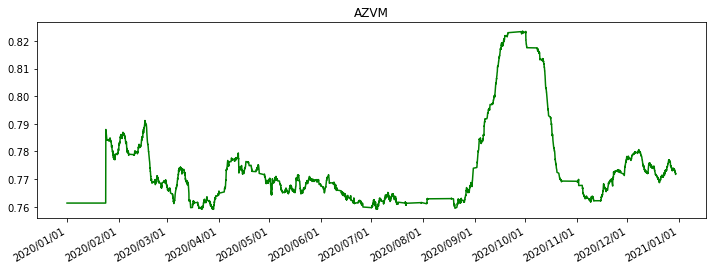

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(12,4))
plt.title(nam[0:4])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,pad_arr,color="green")
plt.gcf().autofmt_xdate()
name=nam[0:4]+"f0.png"
plt.savefig(name,format="PNG")